In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from ClusteringGroundTruth import cluster_gt
np.random.seed(42)

In [2]:
from TestCaseGenerator import data_RLClustering

X, M, T_P, N, d = data_RLClustering(4)

beta_min = 0.1
beta_max = 10000.0
tau = 1.1
eps = 0.7
gamma = 0.0
zeta = 1.0
T = 0.001
rho = np.ones(N) / N  # Uniform weights
Y = np.random.randn(M, 2) * 0.01

from Env import ClusteringEnvNumpy

env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=False,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=T_P,
)

In [3]:
Y, pi, Y_list, pi_list, Betas = cluster_gt(
    X, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau
)

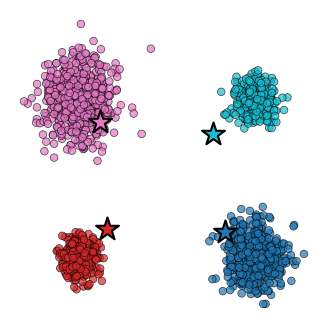

In [4]:
from Plotter import PlotClustering
PlotClustering(X, Y, pi, figsize=(6, 4), save_path=None)

In [ ]:
# create a scenario name that reflects all the parameters
scenario_name = f"GT_N{N}_M{M}_d{d}_betaMin{beta_min}_betaMax{beta_max}_tau{tau}_eps{eps}_gamma{gamma}_zeta{zeta}_T{T}"

In [ ]:
from animator import animate_Clusters
import os

# Create animations directory if it doesn't exist
os.makedirs("animations", exist_ok=True)

animate_Clusters(
    X,
    Y_list,
    pi_list,
    Betas,
    figuresize=(6, 5),
    interval=100,
    save_path=f"animations/Clustering_{scenario_name}.gif",
)

# Save Data

In [ ]:
import pickle
import os

# Create Benchmark directory if it doesn't exist
os.makedirs("Benchmark", exist_ok=True)

# SAVE SCENARIO RESULTS IN Benchmark Folder
with open(f"Benchmark/{scenario_name}.pkl", "wb") as f:
    pickle.dump((X, Y, env, pi, Y_list, pi_list, Betas), f)